# [실습] 효율적 투자 전략
* 대상 종목 : 주식, 채권
* 목표: 주식과 채권을 몇대몇으로 담아야 가장 효율적으로 수익을 낼 수 있는지

In [1]:
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pykrx import stock
from pykrx import bond

import warnings
warnings.filterwarnings(action='ignore')
sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
#plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)



## Data Load

In [2]:
sdf = pd.read_csv("../datasets/kodex_stock.csv")
sdf = sdf.set_index("dt")
sdf = sdf.drop(['high', 'low', 'open','volume'], axis=1)
bdf = pd.read_csv("../datasets/kodex_bond10y.csv")
bdf = bdf.set_index("dt")
bdf = bdf.drop(['high', 'low', 'open','volume'], axis=1)

In [3]:
sdf.shape, bdf.shape

((1845, 1), (1845, 1))

In [4]:
sdf.head()

,close
dt,
2012-01-20,49960.0
2012-01-25,49960.0
2012-01-26,49930.0
2012-01-27,50000.0
2012-01-30,50130.0


In [5]:
bdf.head()

,close
dt,
2012-01-20,23197.4
2012-01-25,23277.4
2012-01-26,23299.6
2012-01-27,23335.2
2012-01-30,23073.0


In [6]:
ret_df = pd.concat([sdf, bdf], axis=1)
ret_df.columns = ['stock','bond']
ret_df

,stock,bond
dt,,
2012-01-20,49960.0,23197.4
2012-01-25,49960.0,23277.4
2012-01-26,49930.0,23299.6
2012-01-27,50000.0,23335.2
2012-01-30,50130.0,23073.0
...,...,...
2019-07-17,71210.0,27225.0
2019-07-18,71665.0,27165.0
2019-07-19,71770.0,27545.0


## 수익률, 리스크, 샤프지수

In [7]:
daily_ret = ret_df.pct_change() 
annual_ret = daily_ret.mean() * 252
daily_cov = daily_ret.cov() 
annual_cov = daily_cov * 252

port_ret     = [] 
port_risk    = [] 
port_weights = [] 
port_sharp   = [] 
stocks = ret_df.columns

for _ in range(20000): 
    weights = np.random.random(len(stocks)) 
    weights = weights / np.sum(weights) 

    
    returns = np.dot(weights, annual_ret) 
    risk    = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights))) 
    sharp   =  returns / risk
    
    port_ret.append(returns) 
    port_risk.append(risk) 
    port_weights.append(np.round(weights,2)) 
    port_sharp.append(sharp) 
    
    
port_dic = {'Return': port_ret, 'Risk': port_risk, 'Sharp':port_sharp ,'Weight': port_weights} 
ret_df = pd.DataFrame(port_dic) 
print(f'{stocks.values}')
ret_df.head()

['stock' 'bond']


,Return,Risk,Sharp,Weight
0,0.047434,0.039969,1.186761,"[0.84, 0.16]"
1,0.041131,0.066882,0.614984,"[0.49, 0.51]"
2,0.042985,0.055800,0.770331,"[0.59, 0.41]"
3,0.041069,0.067276,0.610454,"[0.48, 0.52]"
4,0.036938,0.095536,0.386646,"[0.25, 0.75]"


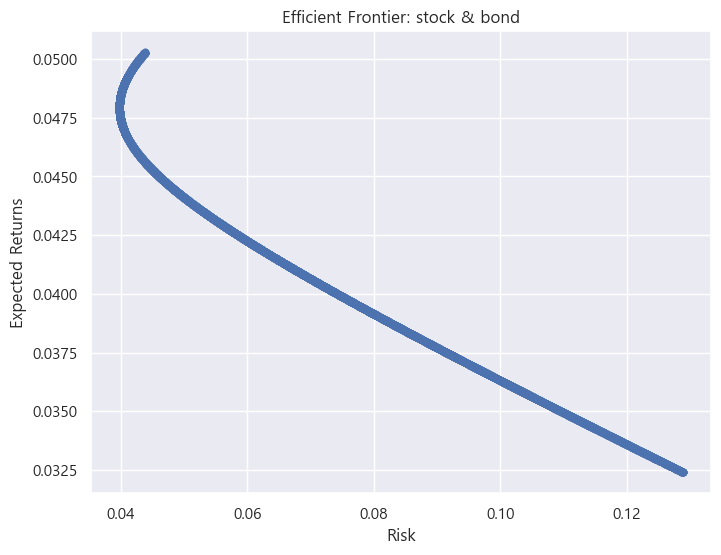

In [26]:
ret_df.plot.scatter(x='Risk', y='Return', figsize=(8, 6), grid=True)

plt.title('Efficient Frontier: stock & bond') 
plt.xlabel('Risk') 
plt.ylabel('Expected Returns')

plt.plot()
# plt.gca().add_line(df['샤프지수'])
plt.show() 

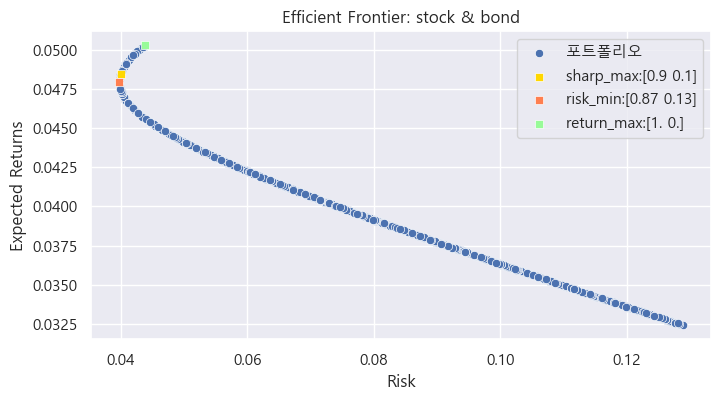

In [27]:
sharp_max = ret_df[ret_df['Sharp'] == ret_df['Sharp'].max()]
risk_min  = ret_df[ret_df['Risk'] == ret_df['Risk'].min()] 
return_max = ret_df[ret_df['Return'] == ret_df['Return'].max()] 

plt.figure(figsize=(8,4))
sns.scatterplot(data=ret_df, x='Risk', y='Return' , label=f"포트폴리오")
sns.scatterplot(data=sharp_max , x='Risk', y='Return', marker="s", c='gold', label=f"sharp_max:{sharp_max['Weight'].values[0]}")
sns.scatterplot(data=risk_min  , x='Risk', y='Return', marker="s", c='coral', label=f"risk_min:{risk_min['Weight'].values[0]}")
sns.scatterplot(data=return_max, x='Risk', y='Return', marker="s", c='palegreen', label=f"return_max:{return_max['Weight'].values[0]}")

plt.title(f'Efficient Frontier: stock & bond') 
plt.xlabel('Risk') 
plt.ylabel('Expected Returns') 
plt.show() 

## 가중치

In [23]:
print(f"sharp_max:{sharp_max['Weight'].values[0]}")
print(f"risk_min:{risk_min['Weight'].values[0]}")
print(f"return_max:{return_max['Weight'].values[0]}")

sharp_max:[0.9 0.1]
risk_min:[0.87 0.13]
return_max:[1. 0.]
